<a href="https://colab.research.google.com/github/yalex1402/AI_Course/blob/master/GeneticAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos Geneticos:**

**Algoritmo:** un algoritmo genetico se puede dividir en cinco procesos principales, a continuación se enumeran cada uno de ellos:


1.   **Inicialización**: Se crea una población inicial con un número N de cromosomas, cada cromosoma representa una solución al problema.
2.   **Función de aptitud**: El objetivo de la función es determinar qué solución es más adecuada.
3.   **Selección**: Selecciona soluciones a través de procesos como la selección de la ruleta y/o selección de torneos.
4.   **Cruce**: Se elige un lugar donde se intercambian los alelos (partes de la solución) entre los progenitores 
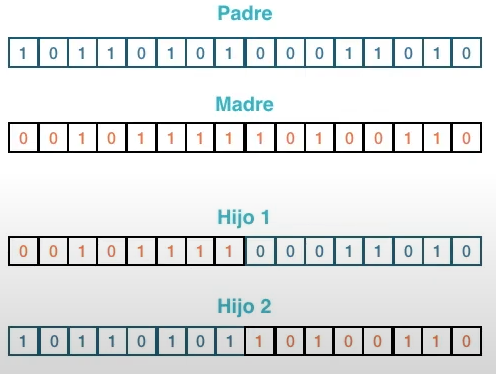
5.   **Mutación**: Para asegurar que los individuos no son todos exactamente iguales, se permite la mutación, consiste en reemplazar valores de una solución

El algoritmo se repite en los procesos 2 al 5 hasta que se cumpla un criterio de parada.



**Problema de la mochila**

Consiste en encontrar la combinación de elementos que maximicen la ganancia sin superar la capacidad máxima, por ejemplo:

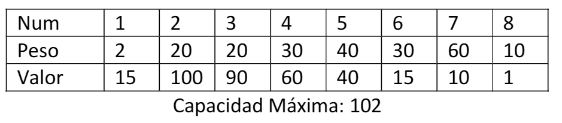

La mejor configuración para la bolsa es:  [1. 0. 1. 1. 1. 0. 1. 1.]
Con una función de aptitud de:  900


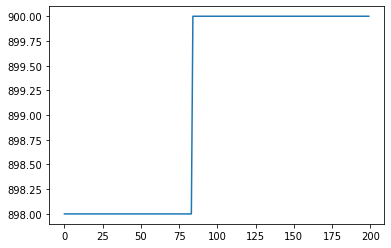

In [188]:
#IMPORTS
import numpy as np
import matplotlib.pyplot as plt

#PARAMETERS

MAX_ITERATION = 200 #Number of iterations to do
CHROMOSOME_NUMBER = 50 #Amount of possible solutions allowed per cycle
GENES = 8 #Items in the problem

#Probability specified with a number between 0 - 1
CROSSING_PROBABILITY = 1.0 
MUTATION_PROBABILITY = 0.4

#FITNESS FUNCTION

#NOTE: When element is 1 it should be included, else, if the element is 0 it shouldn't be included
def FitnessFunction(solution):
    #Problem arrays 
    weight = np.array([25,35,45,5,25,3,2,2])
    value = np.array([350,400,450,20,70,8,5,5])
    MAX_CAPACITY = 104
    
    if (np.sum(weight * solution) > MAX_CAPACITY):
        result = 0
    else:
        result = np.sum(value * solution)
    
    return result

def RouletteSelection():
    probabilities = fitness_function_result/np.sum(fitness_function_result)
    sum_of_probabilities = np.cumsum(probabilities)
    roulette = np.random.random()
    index_chromosome_selected = np.argmax(sum_of_probabilities > roulette)
    return index_chromosome_selected

population = np.round(np.random.random([CHROMOSOME_NUMBER, GENES]))
fitness_function_result = np.zeros([CHROMOSOME_NUMBER], dtype=np.int) 
for chromosome in range(CHROMOSOME_NUMBER):
    fitness_function_result[chromosome] = FitnessFunction(population[chromosome,:])

record = []
for iteration in range(MAX_ITERATION):
    #selection - simple random selection
    first_row_selected = RouletteSelection()
    second_row_selected = RouletteSelection()

    #crossing - One Point
    if (np.random.rand() <= CROSSING_PROBABILITY):
        cross_point = np.random.randint(GENES)
        child1 = np.append(population[first_row_selected, 0:cross_point], population[second_row_selected, cross_point:])
        child2 = np.append(population[second_row_selected, 0:cross_point], population[first_row_selected, cross_point:])
    
    #mutation - Bit Inversion
    if (np.random.rand() <= MUTATION_PROBABILITY):
        mut_point_c1 = np.random.randint(GENES-1)
        mut_point_c2 = np.random.randint(GENES-1)
        child1[mut_point_c1] = 1-child1[mut_point_c1]
        child2[mut_point_c2] = 1-child2[mut_point_c2]

    #evaluation
    eval_child1 = FitnessFunction(child1)
    eval_child2 = FitnessFunction(child2)

    #insertion - Max
    if (eval_child1 > fitness_function_result[first_row_selected]):
        population[first_row_selected] = child1
        fitness_function_result[first_row_selected] = eval_child1
    
    if (eval_child2 > fitness_function_result[second_row_selected]):
        population[second_row_selected] = child2
        fitness_function_result[second_row_selected] = eval_child2

    record.append(np.max(fitness_function_result))

plt.plot(record)
print('La mejor configuración para la bolsa es: ', population[np.argmax(fitness_function_result)])
print('Con una función de aptitud de: ', fitness_function_result[np.argmax(fitness_function_result)])

**Problema del viajero**

Este problema consiste en minimizar el recorrido de N ciudades ubicadas en puntos x,y de un mapa. Los valores se encuentran dados en una tabla como la siguiente:

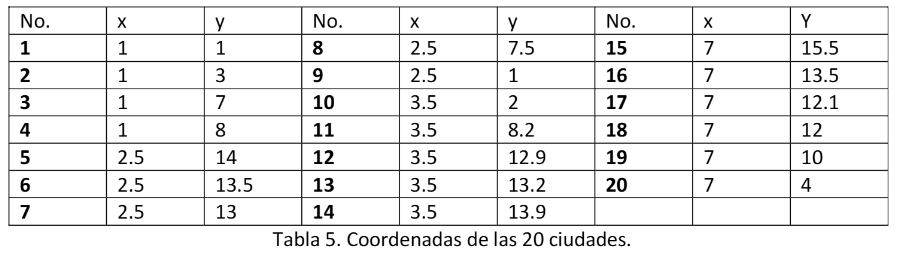

In [223]:
#IMPORTS
import numpy as np
import matplotlib.pyplot as plt

#PARAMETERS

MAX_ITERATION = 200 #Number of iterations to do
CHROMOSOME_NUMBER = 50 #Amount of possible solutions allowed per cycle
GENES = 8 #Items in the problem

#Probability specified with a number between 0 - 1
CROSSING_PROBABILITY = 1.0 
MUTATION_PROBABILITY = 0.4

#FITNESS FUNCTION

def FitnessFunction(solution):
    #Coordinates
    horizontal_position = np.array([1, 1, 1, 1, 2.5, 2.5, 3.5, 3.5, 7.0, 10.0, 7.0, 7.0])
    vertical_position = np.array([1, 3, 7, 8, 7.5, 1.0, 2.0, 8.2, 15.5, 13.5, 12.1, 12])
    #It ends in the same city of starting 
    solution = np.append(solution ,solution[0])
    distance = 0 

    for city in range(len(horizontal_position)):
        #Points for each city
        point_x1 = horizontal_position[solution[city]]
        point_x2 = horizontal_position[solution[city+1]]
        point_y1 = vertical_position[solution[city]]
        point_y2 = vertical_position[solution[city+1]]
        
        #Linear distance between 2 adyacent cities
        distance += np.sqrt( (point_x1-point_x2)**2 + (point_y1-point_y2)**2 )

        return 1.0/distance

def RouletteSelection():
    probabilities = fitness_function_result/np.sum(fitness_function_result)
    sum_of_probabilities = np.cumsum(probabilities)
    roulette = np.random.random()
    index_chromosome_selected = np.argmax(sum_of_probabilities > roulette)
    return index_chromosome_selected

population = np.zeros([CHROMOSOME_NUMBER, GENES], dtype=np.int)
fitness_function_result = np.zeros([CHROMOSOME_NUMBER], dtype=np.float) 
for chromosome in range(CHROMOSOME_NUMBER):
    population[chromosome, :] = np.random.permutation(GENES) 
    fitness_function_result[chromosome] = FitnessFunction(population[chromosome])

plot_max_fa = []

for iteration in range(MAX_ITERATION):
    #selection - best selection (parent1)
    index_first_city_selected = np.argsort(fitness_function_result)[::-1][0]
    index_second_city_selected = np.random.randint(CHROMOSOME_NUMBER)
    first_city_selected = population[index_first_city_selected]
    second_city_selected = population[index_second_city_selected]

    #cross: permutation one point
    if (np.random.rand() <= CROSSING_PROBABILITY):
        cross_point = np.random.randint(GENES)
        child1 = first_city_selected[0:cross_point]
        child2 = second_city_selected[0:cross_point]
        
        for gen in range(GENES):
            gen_to_validate = (cross_point + gen) % GENES #It selects a gen to validate since the cross_point
            if not(np.count_nonzero(child1 == second_city_selected[gen_to_validate])):
                child1 = np.append(child1, second_city_selected[gen_to_validate])
            
            if not(np.count_nonzero(child2 == first_city_selected[gen_to_validate])):
                child2 = np.append(child2, first_city_selected[gen_to_validate])
    
    #mutation: order change
    if (np.random.rand() <= MUTATION_PROBABILITY):
        mut_point_c1 = np.random.randint(GENES-1)
        mut_point_c2 = np.random.randint(GENES-1)
    
        temp = child1[mut_point_c1]
        child1[mut_point_c1] = child1[mut_point_c2]
        child1[mut_point_c2] = temp
        
        temp = child2[mut_point_c1]
        child2[mut_point_c1] = child2[mut_point_c2]
        child2[mut_point_c2] = temp
    
    #evaluation
    eval_child1 = FitnessFunction(child1)
    eval_child2 = FitnessFunction(child2)

    #insertion - max
    if (eval_child1 > fitness_function_result[index_first_city_selected]):
        population[index_first_city_selected] = child1
        fitness_function_result[index_first_city_selected] = eval_child1
    
    if (eval_child2 > fitness_function_result[index_second_city_selected]):
        population[index_second_city_selected] = child2
        fitness_function_result[index_second_city_selected] = eval_child2
    
print('La mejor ruta es: ', population[np.argmax(fitness_function_result)])
print('Con una función de aptitud de: ', fitness_function_result[np.argmax(fitness_function_result)])    


La mejor ruta es:  [3 2 6 5 4 0 7 1]
Con una función de aptitud de:  1.0
